In [28]:
path = 'C:\IITGN 2nd year\ES 204 Digital Systems\Local Contrast Enhancement of Image\\105.jpg'
import matplotlib.image as Image
import numpy as np
import matplotlib.pyplot as plt

(150, 150)
(150, 150)


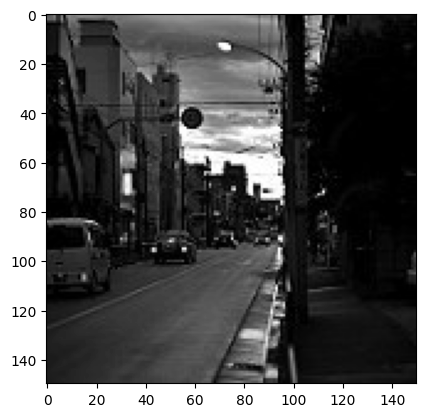

In [29]:
img= Image.imread(path)
print (img.shape)
# image has same rgb value means it is gray scale but stored in the rgb format
# gray_img=img[:,:,0]
gray_img=img
print (gray_img.shape)

plt.imshow(gray_img, cmap='gray')


In [30]:
gray_img = np.asarray(gray_img)
img_1d = gray_img.flatten()
print(img_1d.shape)

(22500,)


<BarContainer object of 256 artists>

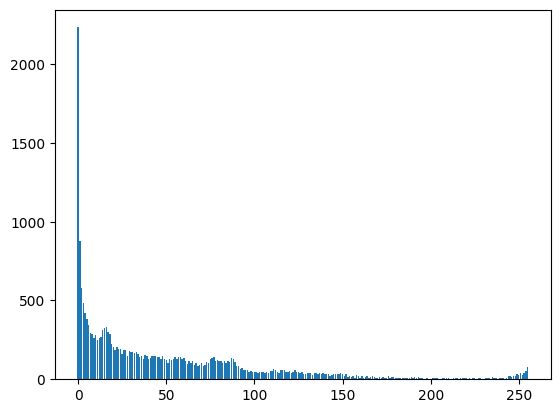

In [31]:
intensity=np.zeros(256)
for pixel in img_1d:
    intensity[pixel]+=1

plt.bar(range(256),intensity)


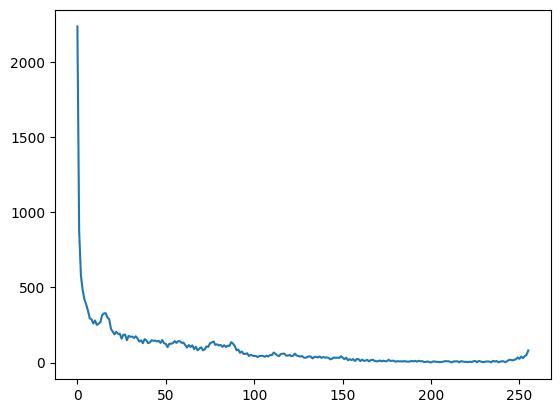

In [32]:
pdf = intensity

plt.plot(pdf)

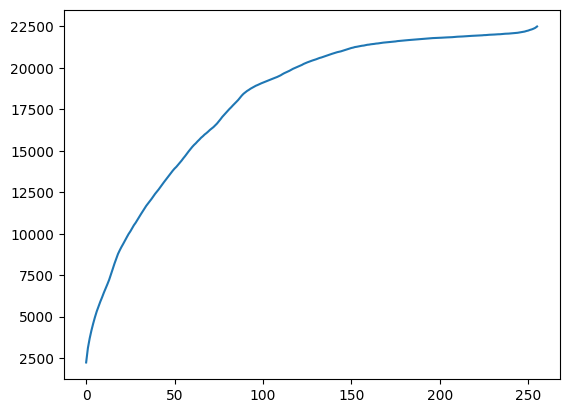

In [33]:
cdf = np.zeros(256)
cdf[0] = pdf[0]
for i in range(1,256):
    cdf[i] = cdf[i-1]+pdf[i]

plt.plot(cdf)

In [46]:
cdf_normalized = (cdf -cdf[cdf>0].min())/(img_1d.size - cdf[cdf>0].min())
print(cdf[cdf>0].min())
histo_equal = np.round(cdf_normalized*(255)).astype(np.uint8)

print(histo_equal)
print(gray_img)
print(histo_equal[gray_img])


2234.0
[  0  11  18  24  30  34  39  43  46  49  53  56  59  63  67  71  75  79
  82  85  88  90  93  95  98 100 102 104 106 108 110 113 115 117 119 121
 123 124 126 128 130 131 133 135 137 139 140 142 144 146 147 148 150 152
 153 155 157 158 160 162 164 165 166 168 169 171 172 173 174 175 176 178
 179 180 181 183 185 186 188 189 191 192 194 195 196 198 199 201 203 204
 205 206 207 208 209 209 210 211 211 212 212 213 213 214 215 215 216 216
 217 217 218 219 220 220 221 221 222 223 223 224 225 225 226 227 227 228
 228 229 229 230 230 231 231 231 232 232 233 233 234 234 235 235 235 236
 236 237 237 237 238 238 239 239 239 240 240 240 240 241 241 241 241 241
 242 242 242 242 242 243 243 243 243 243 243 243 244 244 244 244 244 244
 244 245 245 245 245 245 245 245 245 245 246 246 246 246 246 246 246 246
 246 246 246 246 247 247 247 247 247 247 247 247 247 247 247 247 248 248
 248 248 248 248 248 248 248 248 248 248 248 249 249 249 249 249 249 249
 249 249 249 249 250 250 250 250 250 250 250

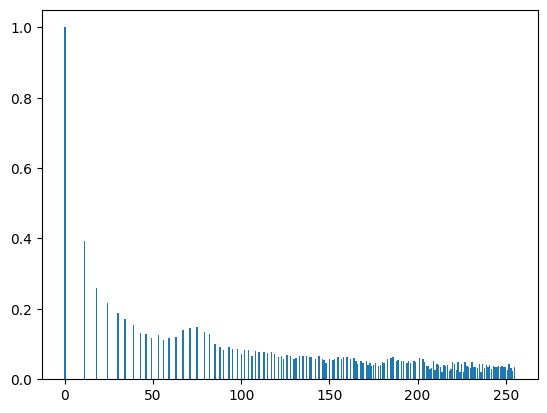

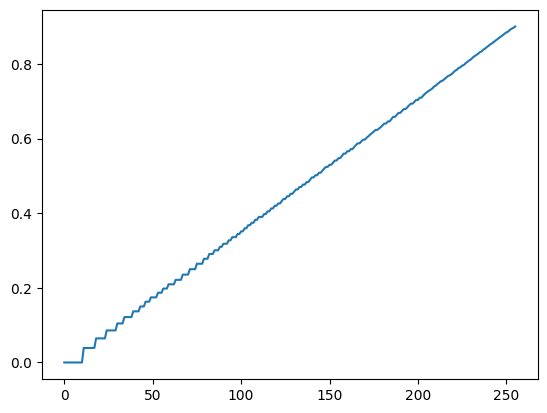

In [47]:
equalized_img = histo_equal[gray_img]

equalized_intensity = np.zeros(256)
for pixel in equalized_img.flatten():
    equalized_intensity[pixel] += 1

cdf_equal = np.zeros(256)
for i in range(1,256):
    cdf_equal[i] = cdf_equal[i-1]+equalized_intensity[i]

plt.bar(range(256),equalized_intensity/np.max(intensity))
plt.show()
plt.plot(cdf_equal/np.max(cdf))


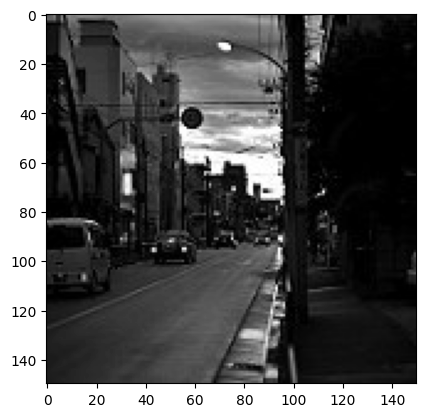

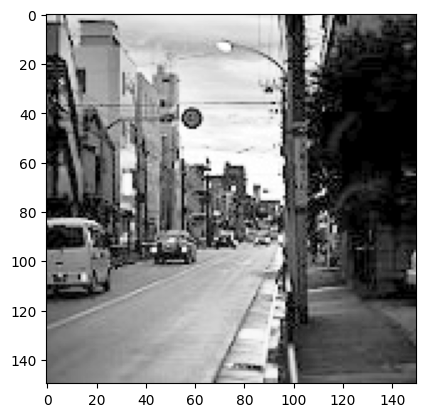

In [48]:
plt.imshow(img, cmap='gray')
plt.show()
plt.imshow(equalized_img, cmap='gray')